# K-Means Clustering


Let's work through an example of unsupervised learning - clustering customer data.

## Goal:

When working with unsupervised learning methods, its usually important to lay out a general goal. In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend **heavily** on the domain itself, in this case, marketing.

----

## The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("D:\\Study\Programming\\python\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\22 - K-Means Clustering\\32407452-bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Continuous Feature Analysis

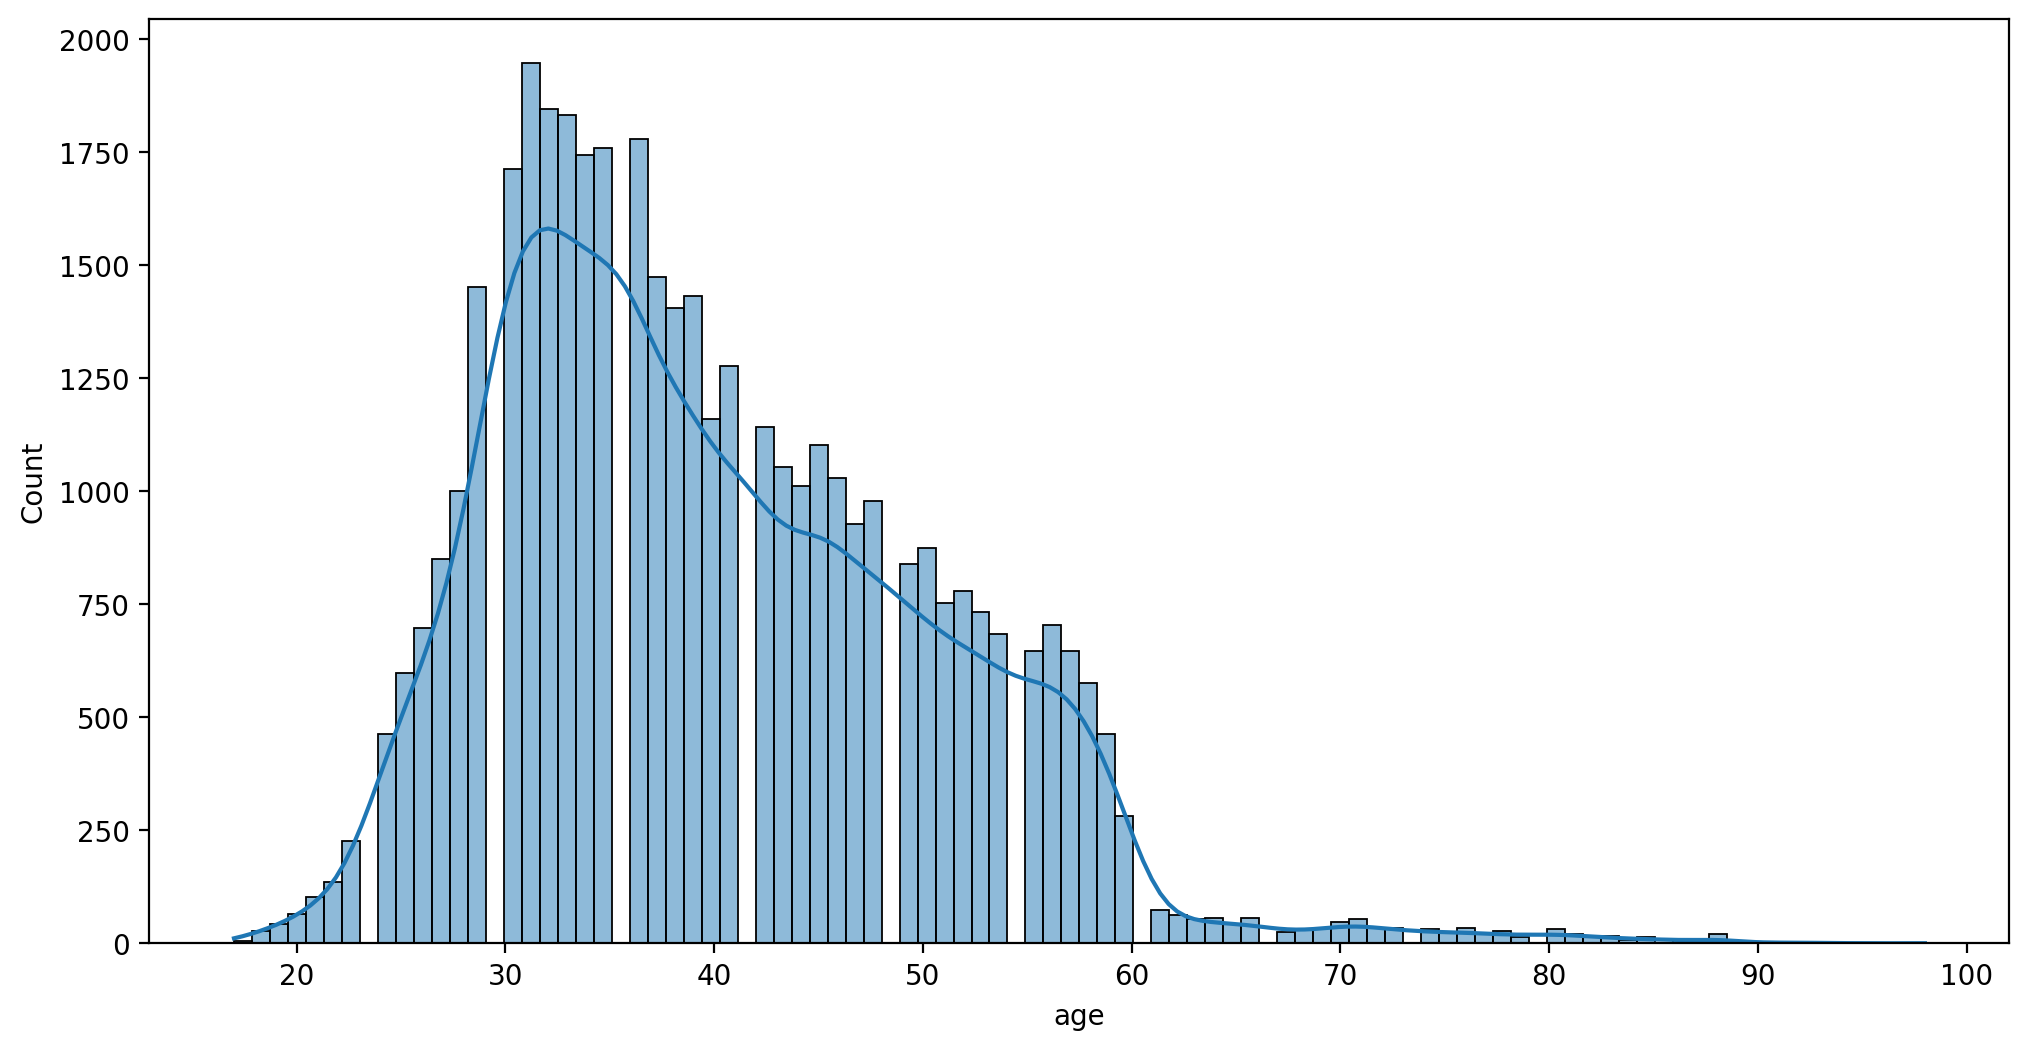

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',kde=True);

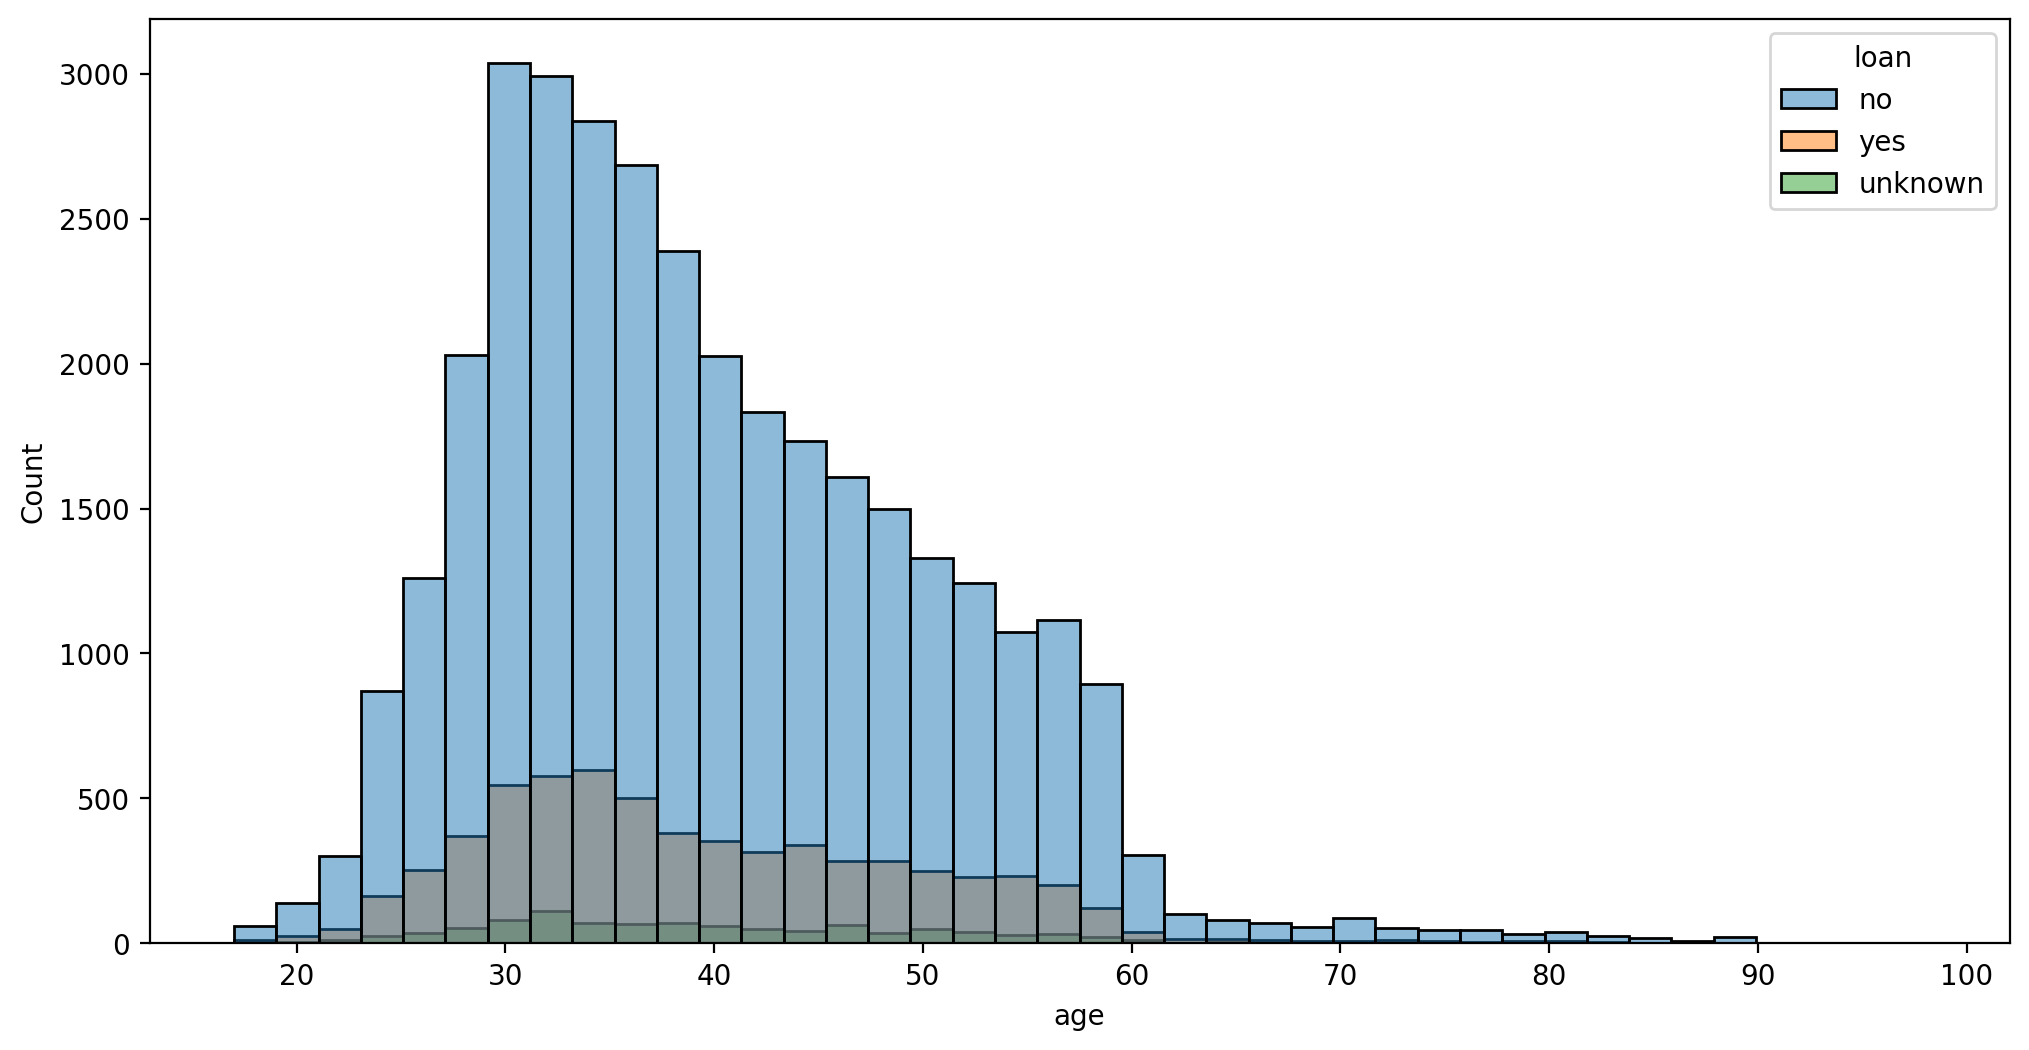

In [14]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',bins=40,hue='loan');

Here pday is how many days before person is contacted like 5 days me person contact 5 days ago , 999 means person is never been contacted

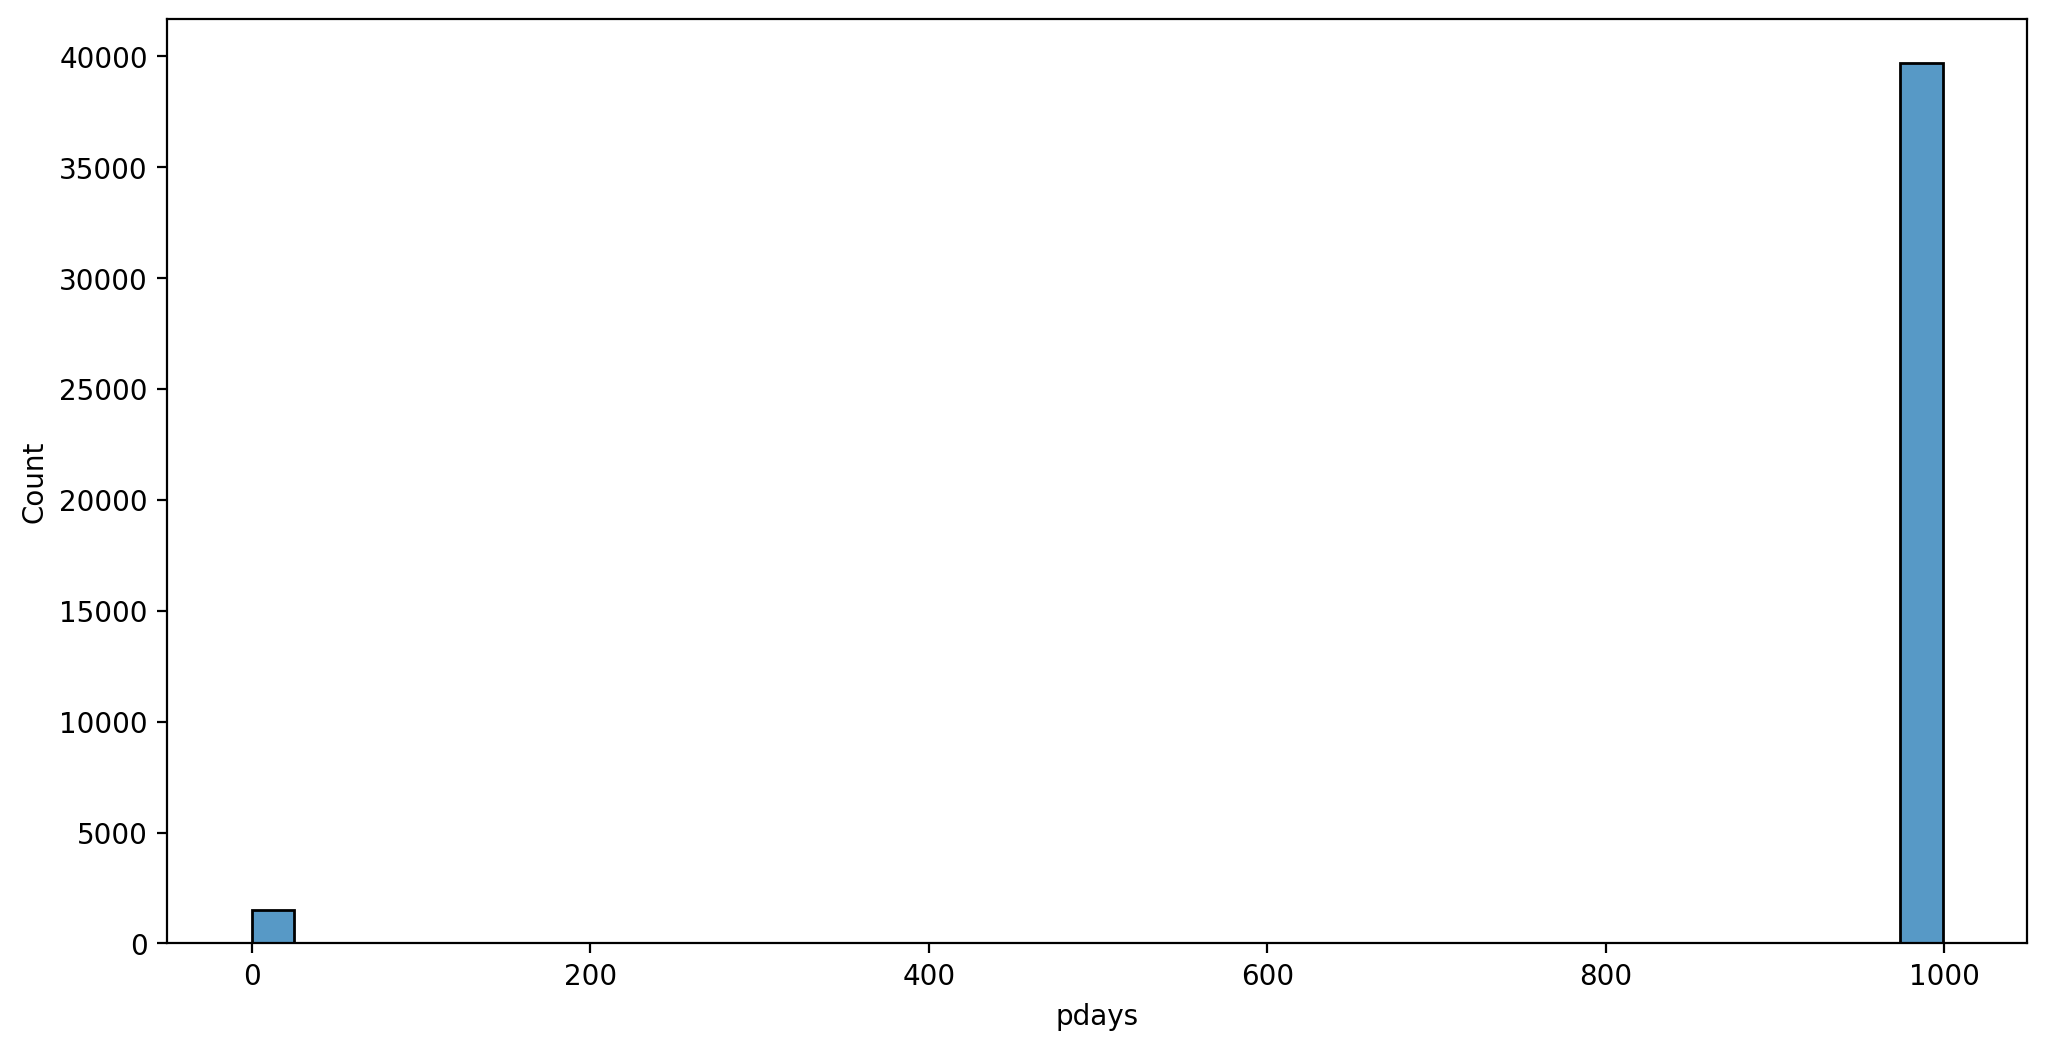

In [15]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays',bins=40);

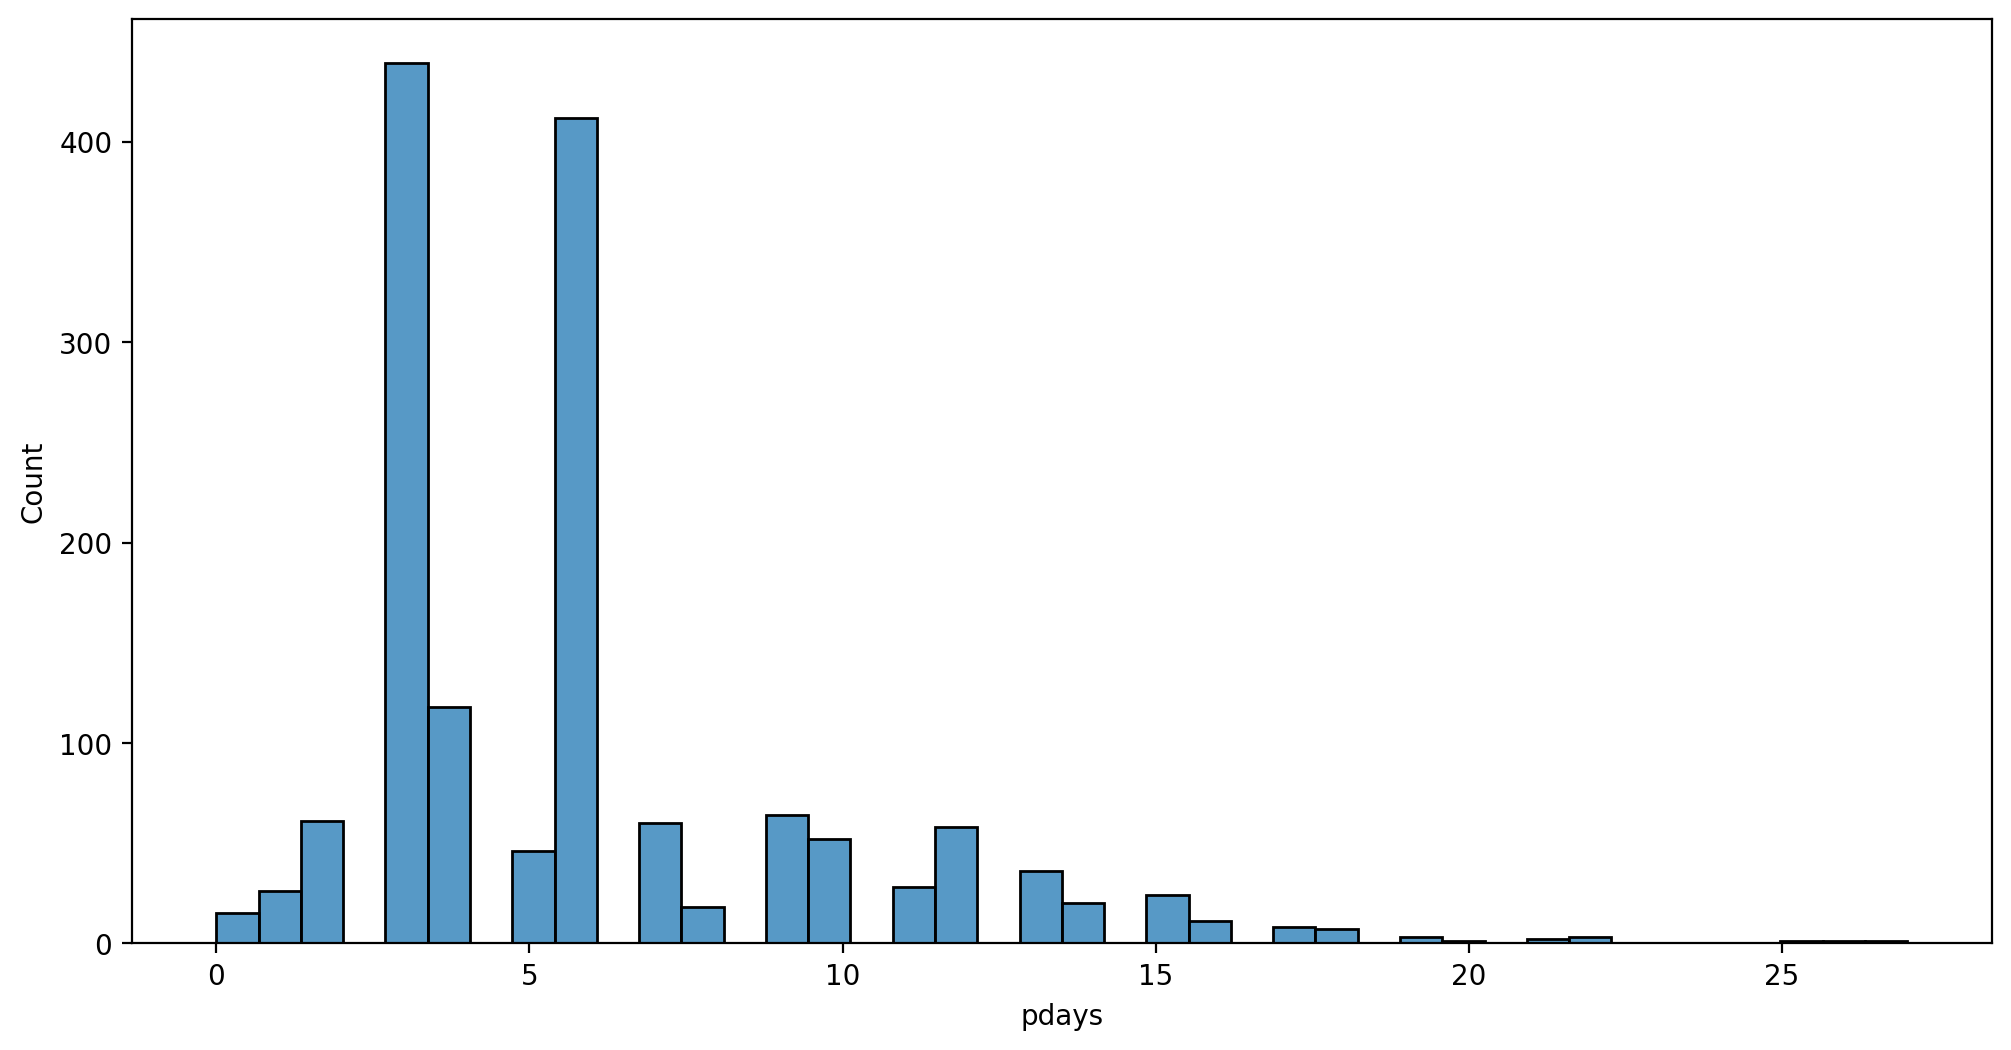

In [17]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(x='pdays',data=df[df['pdays']!=999],bins=40);

In [18]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

**Contact duration - contact with customer made, how long did call last?**

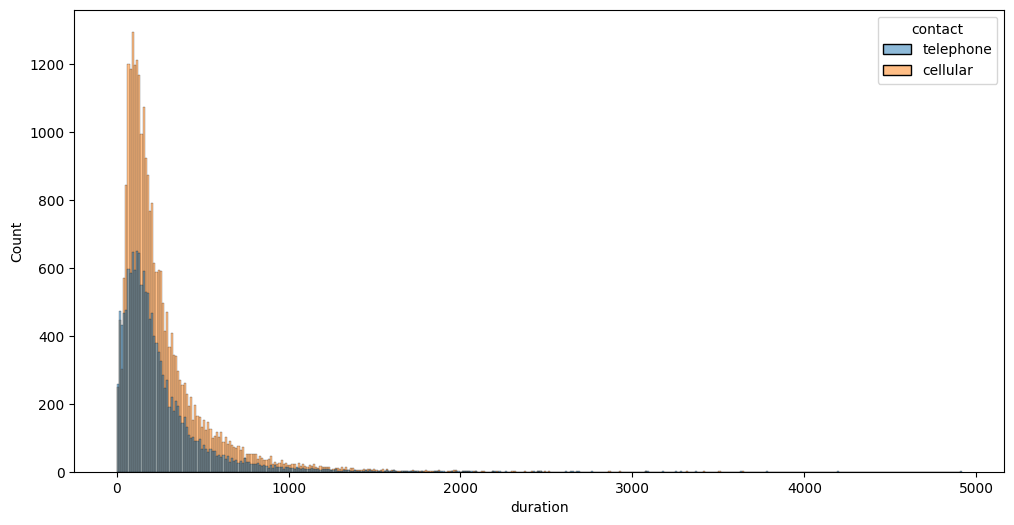

In [21]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=df,x='duration',hue='contact');

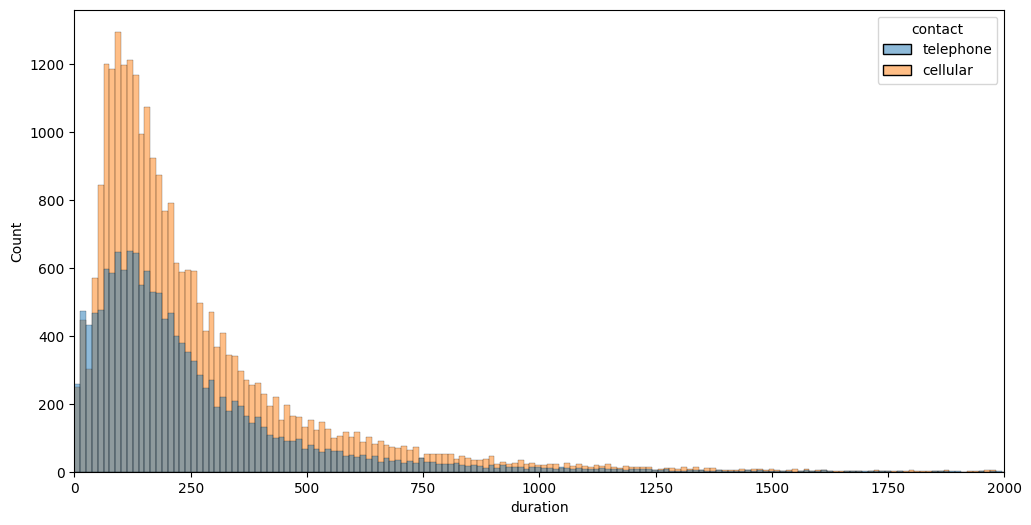

In [23]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000);

* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

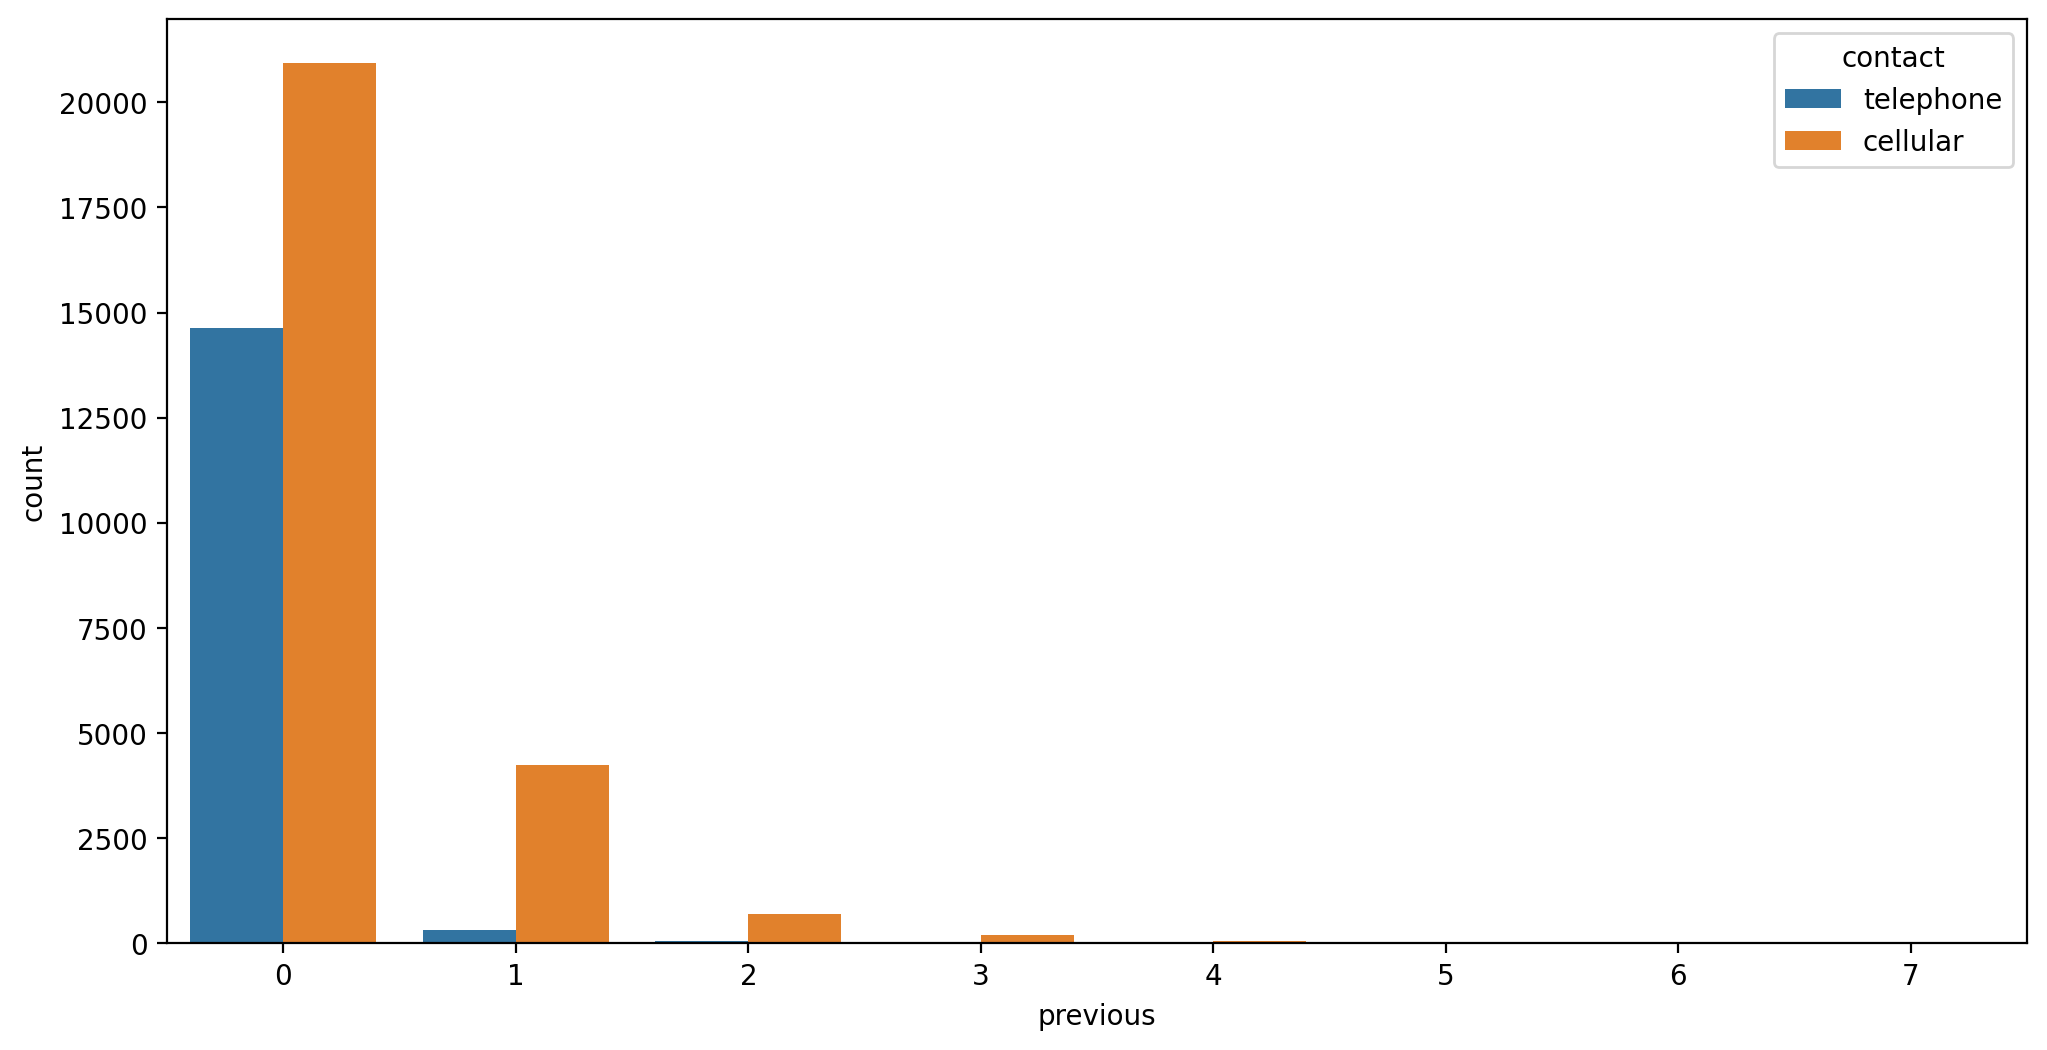

In [27]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact');

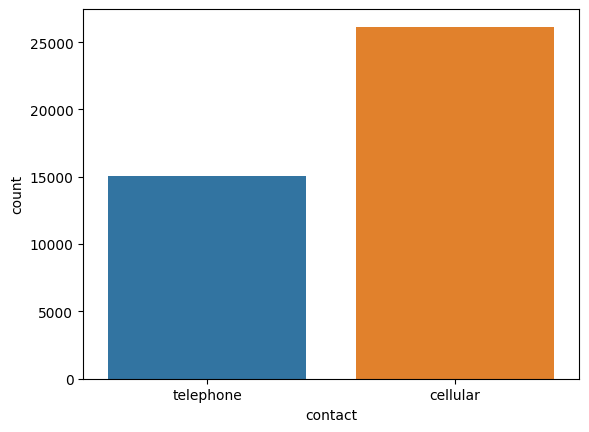

In [25]:
sns.countplot(data=df,x='contact');

In [28]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [29]:
df['previous'].value_counts().sum()

41188

## Categorical Features

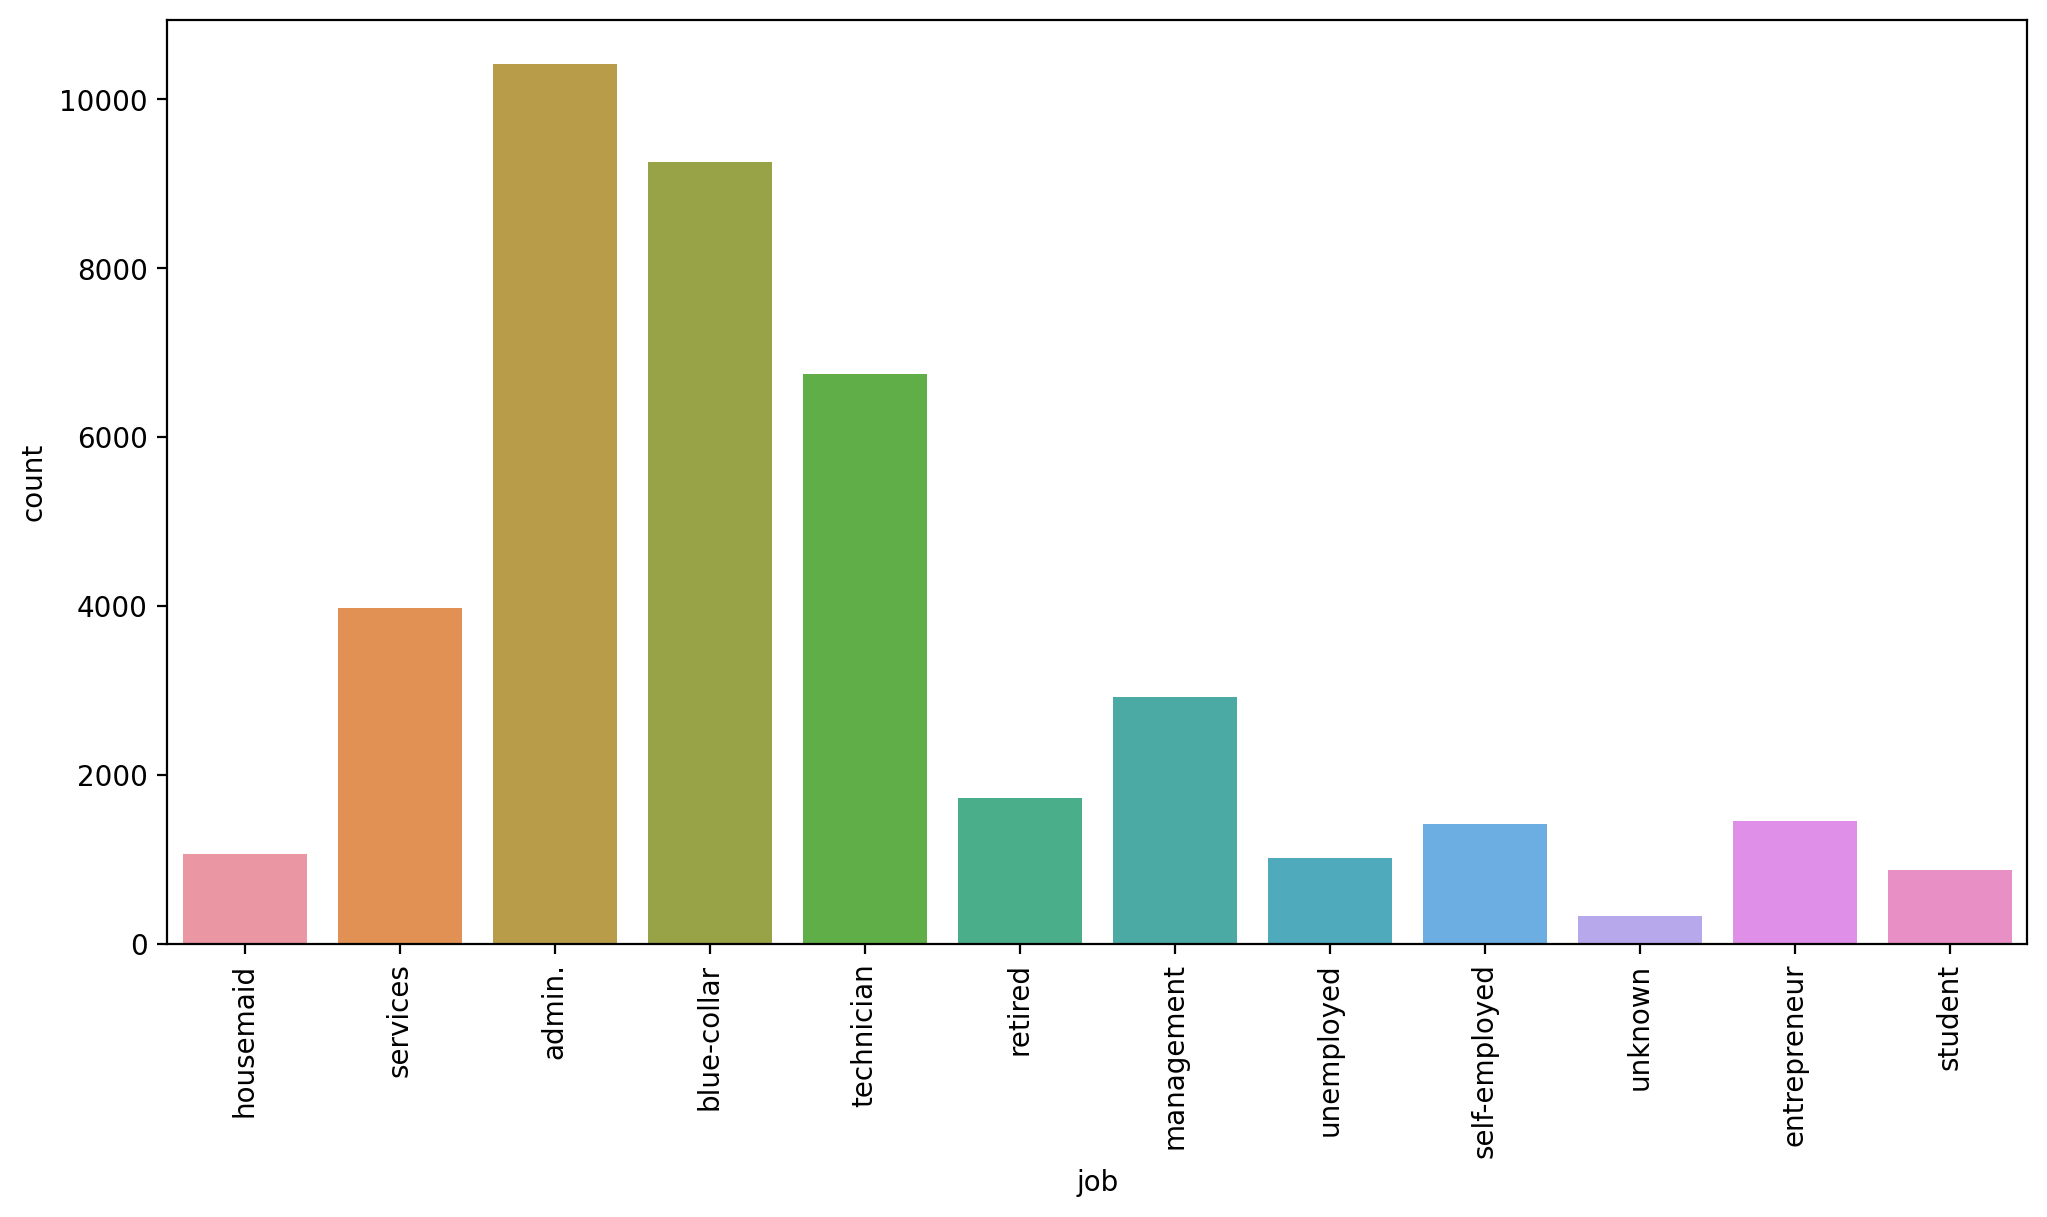

In [33]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='job')
plt.xticks(rotation=90);

In [37]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

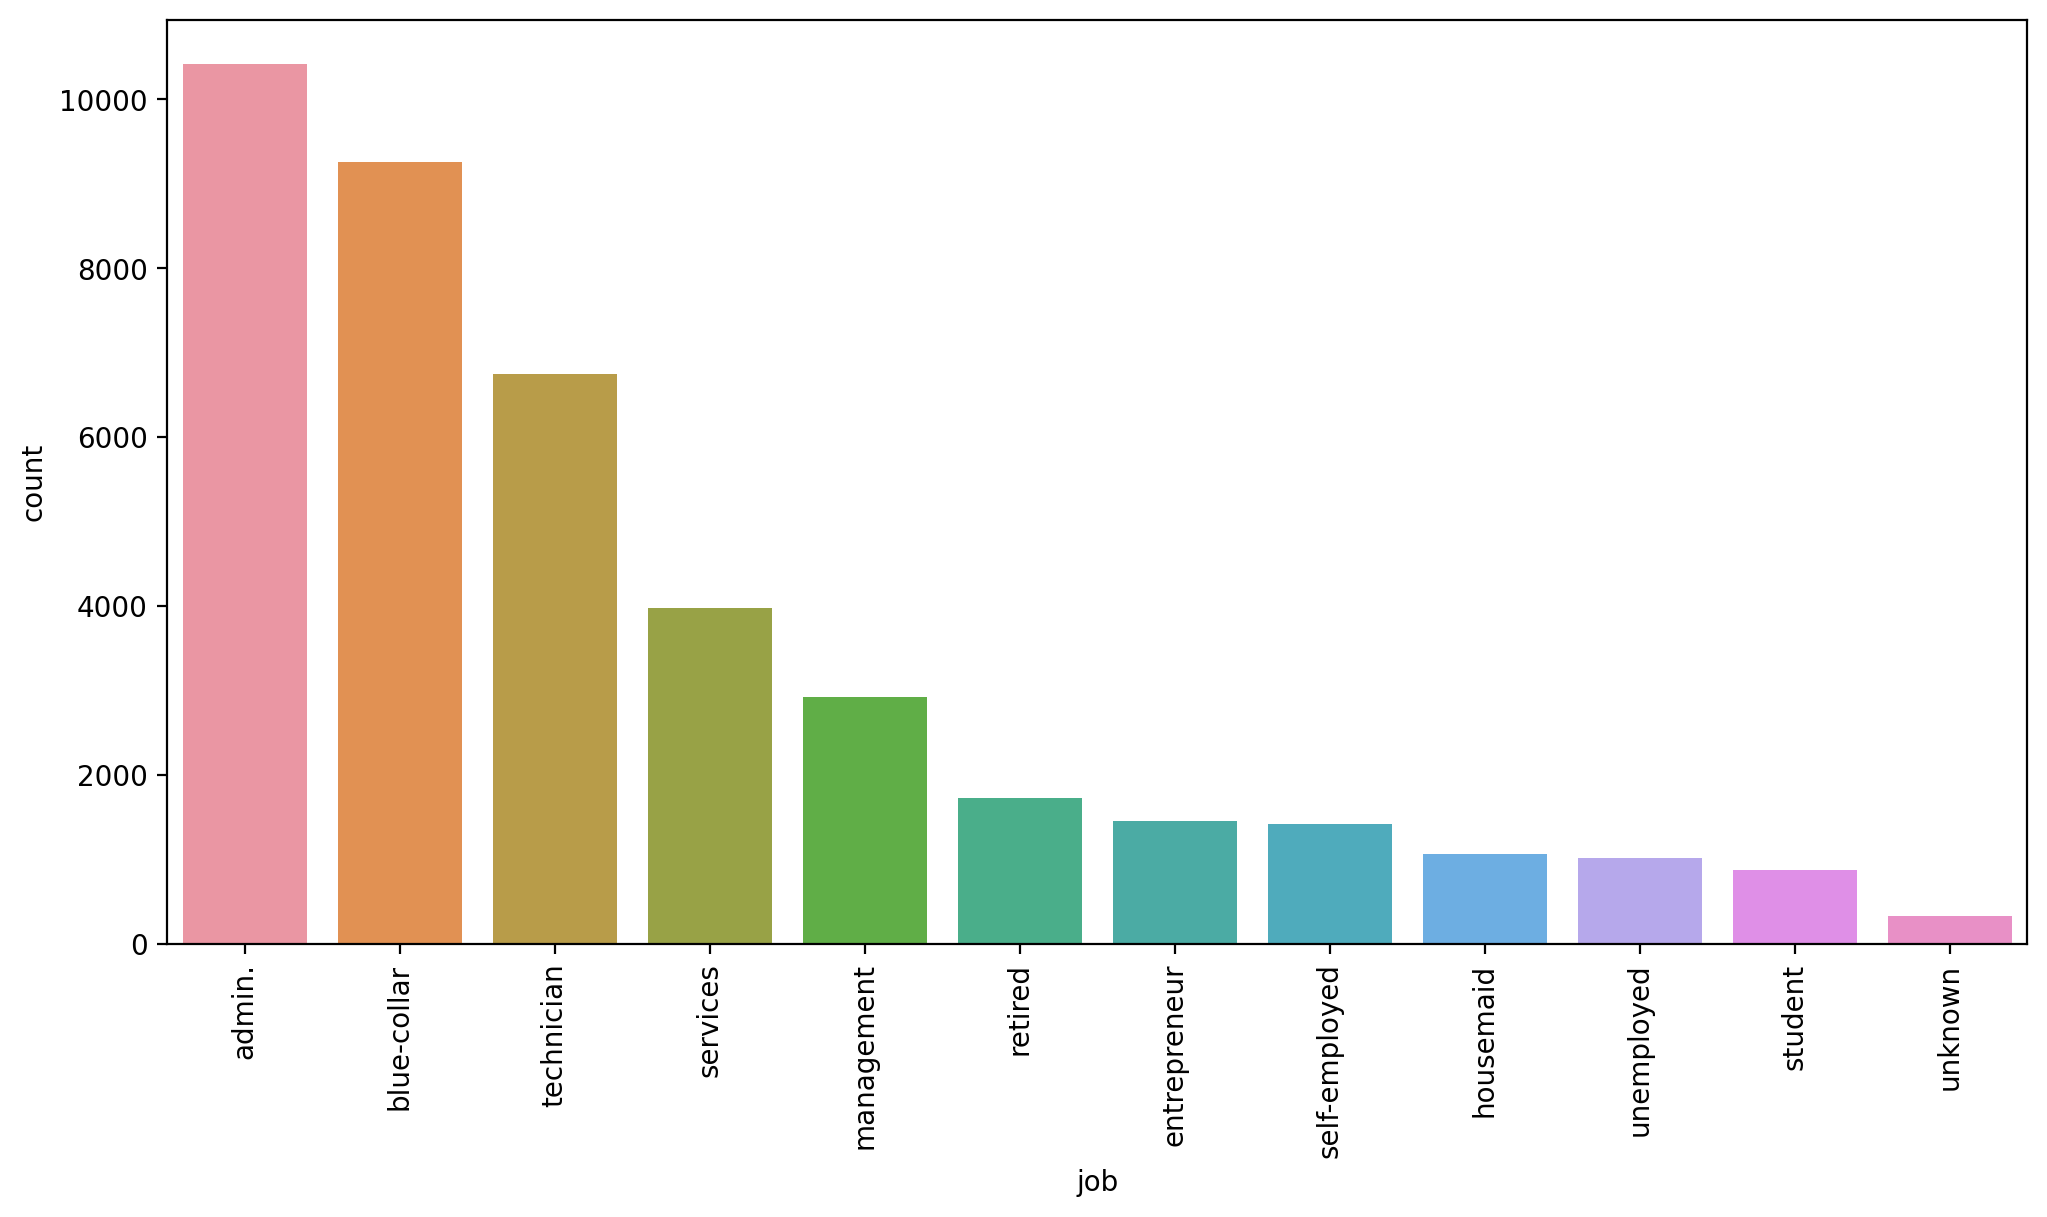

In [43]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

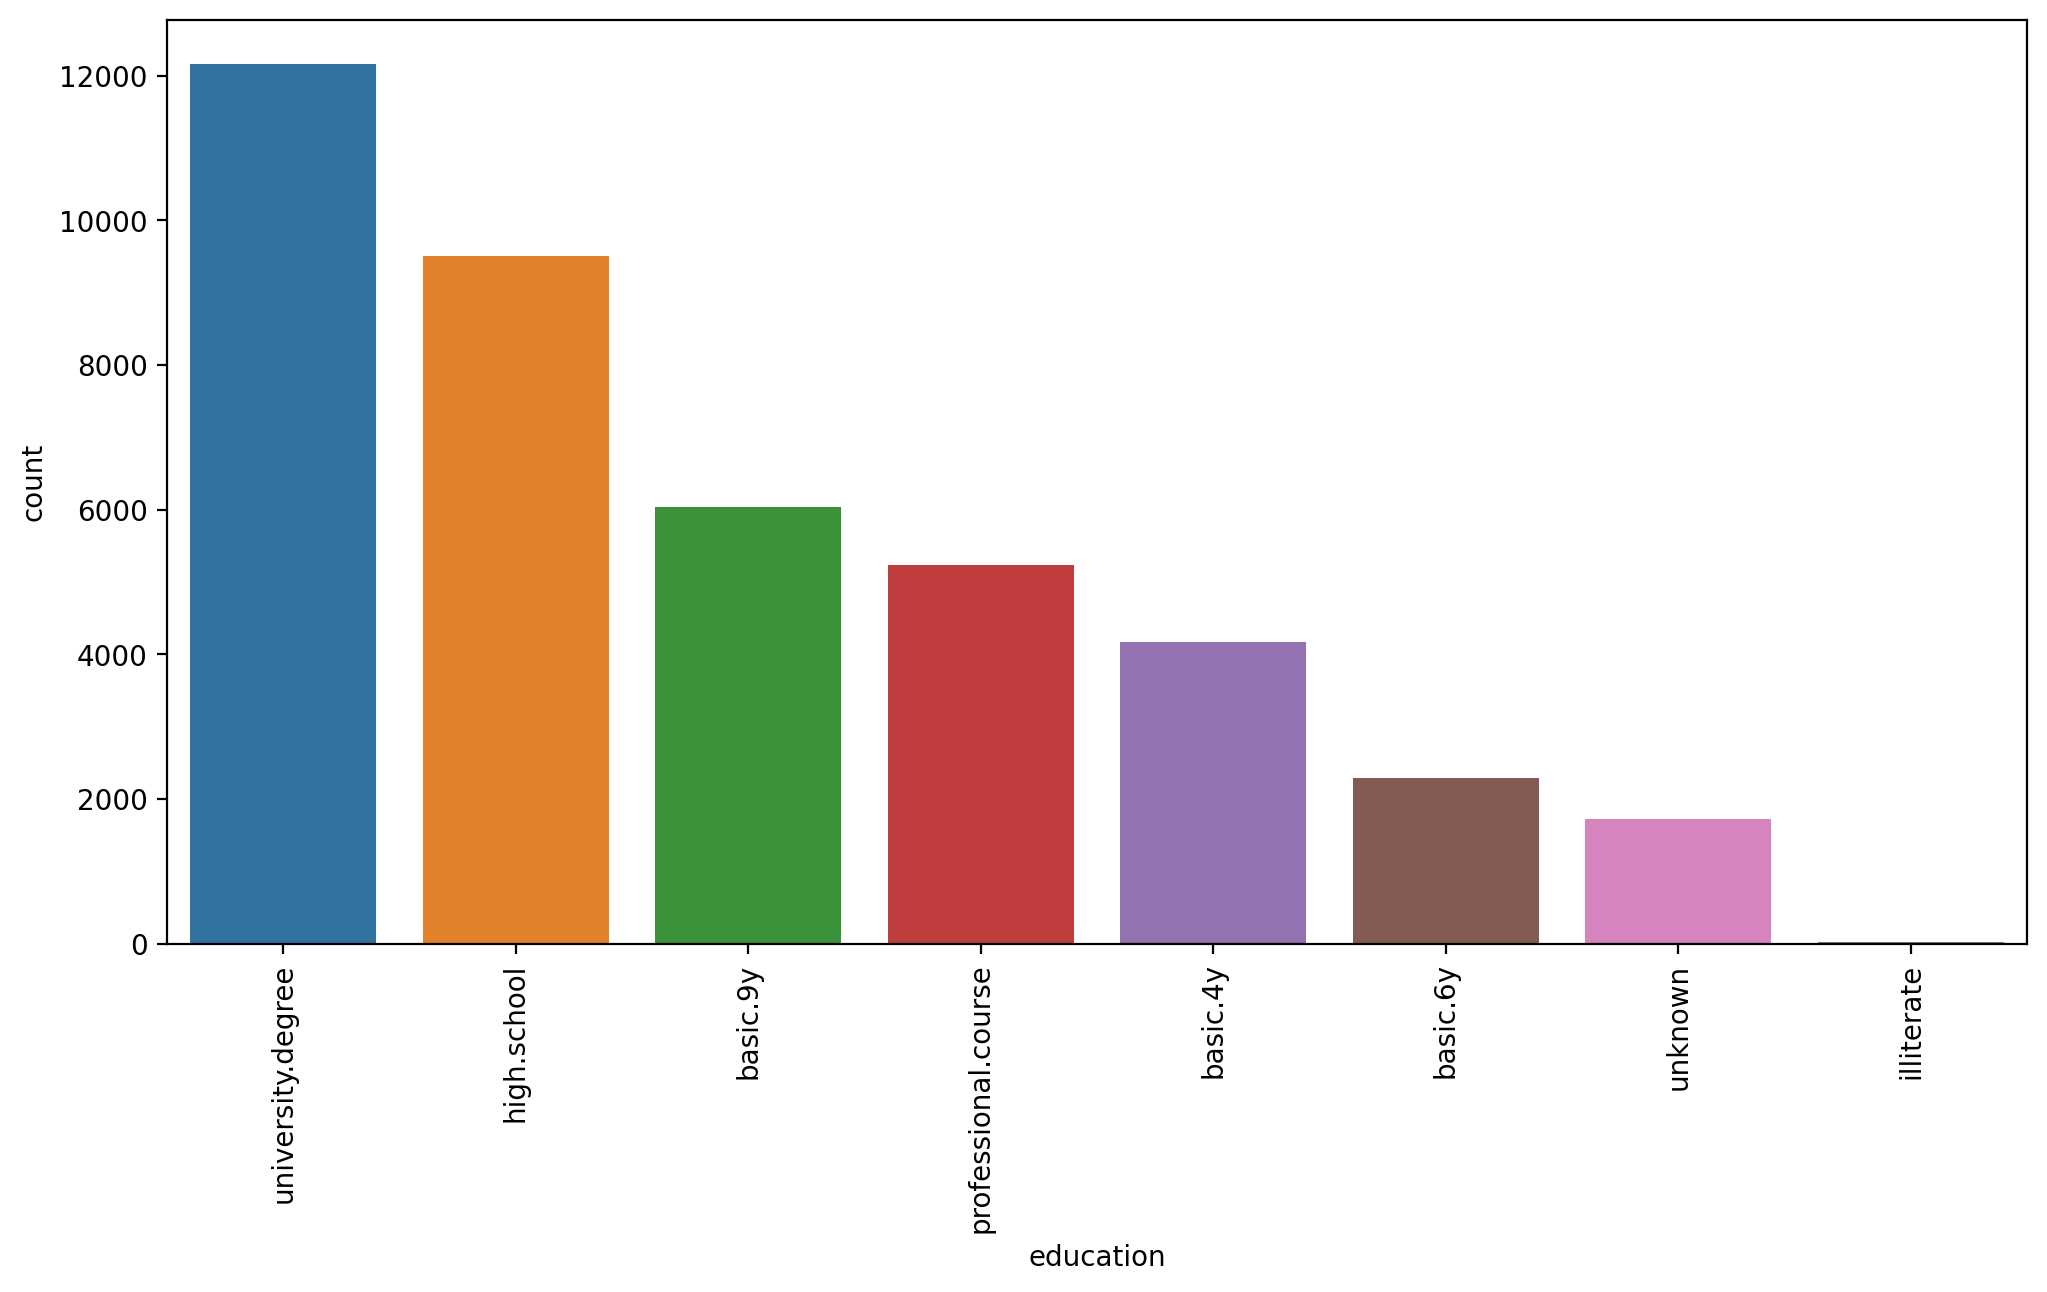

In [44]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

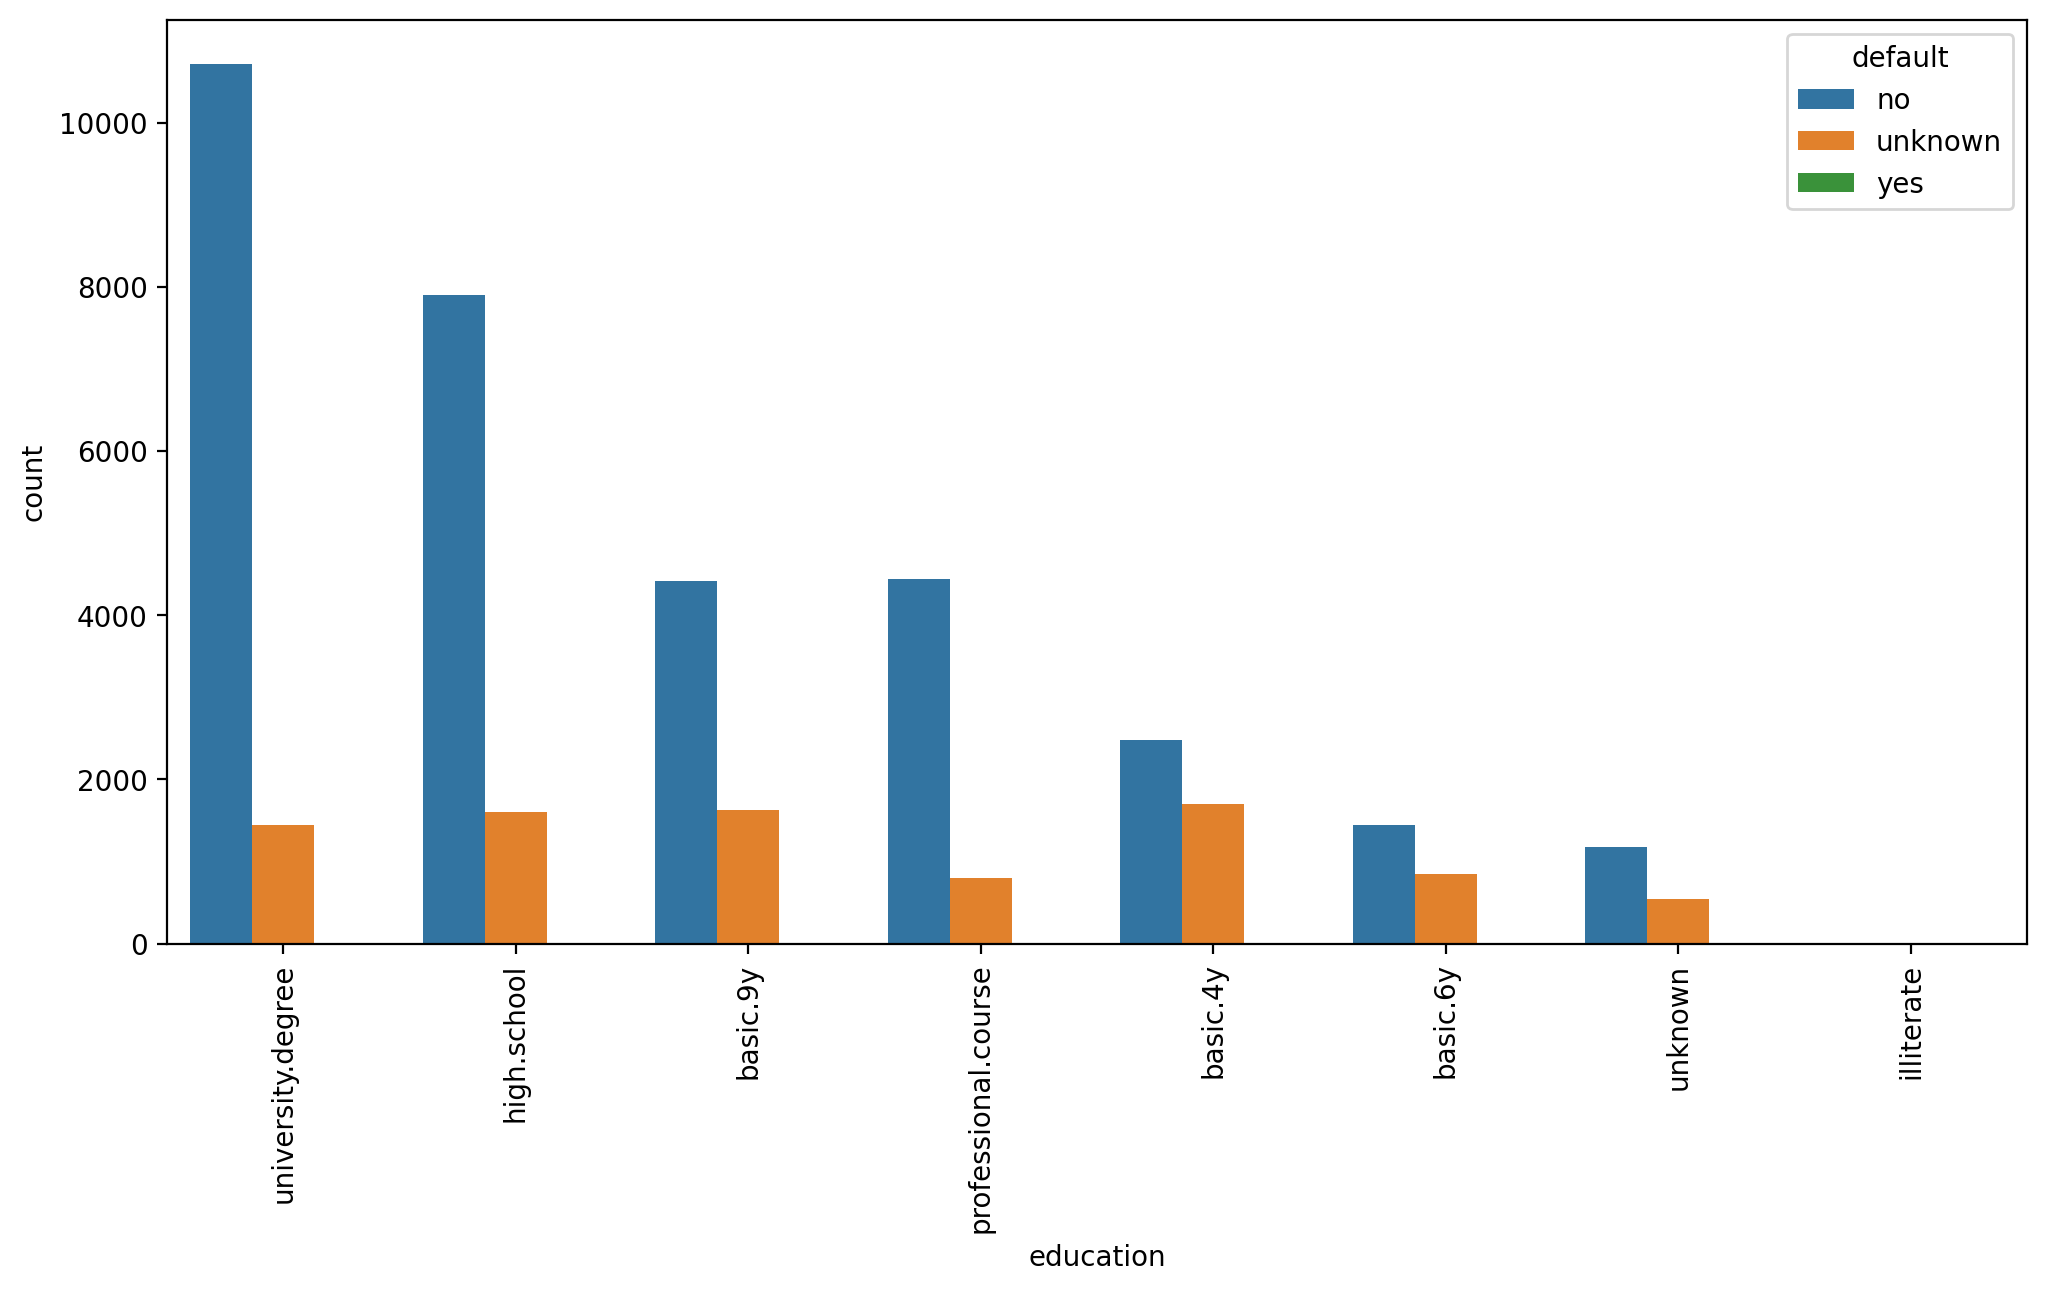

In [45]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

In [50]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

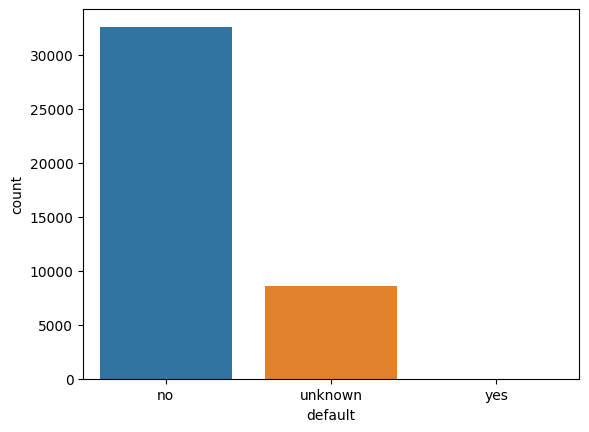

In [47]:
sns.countplot(data=df,x='default');

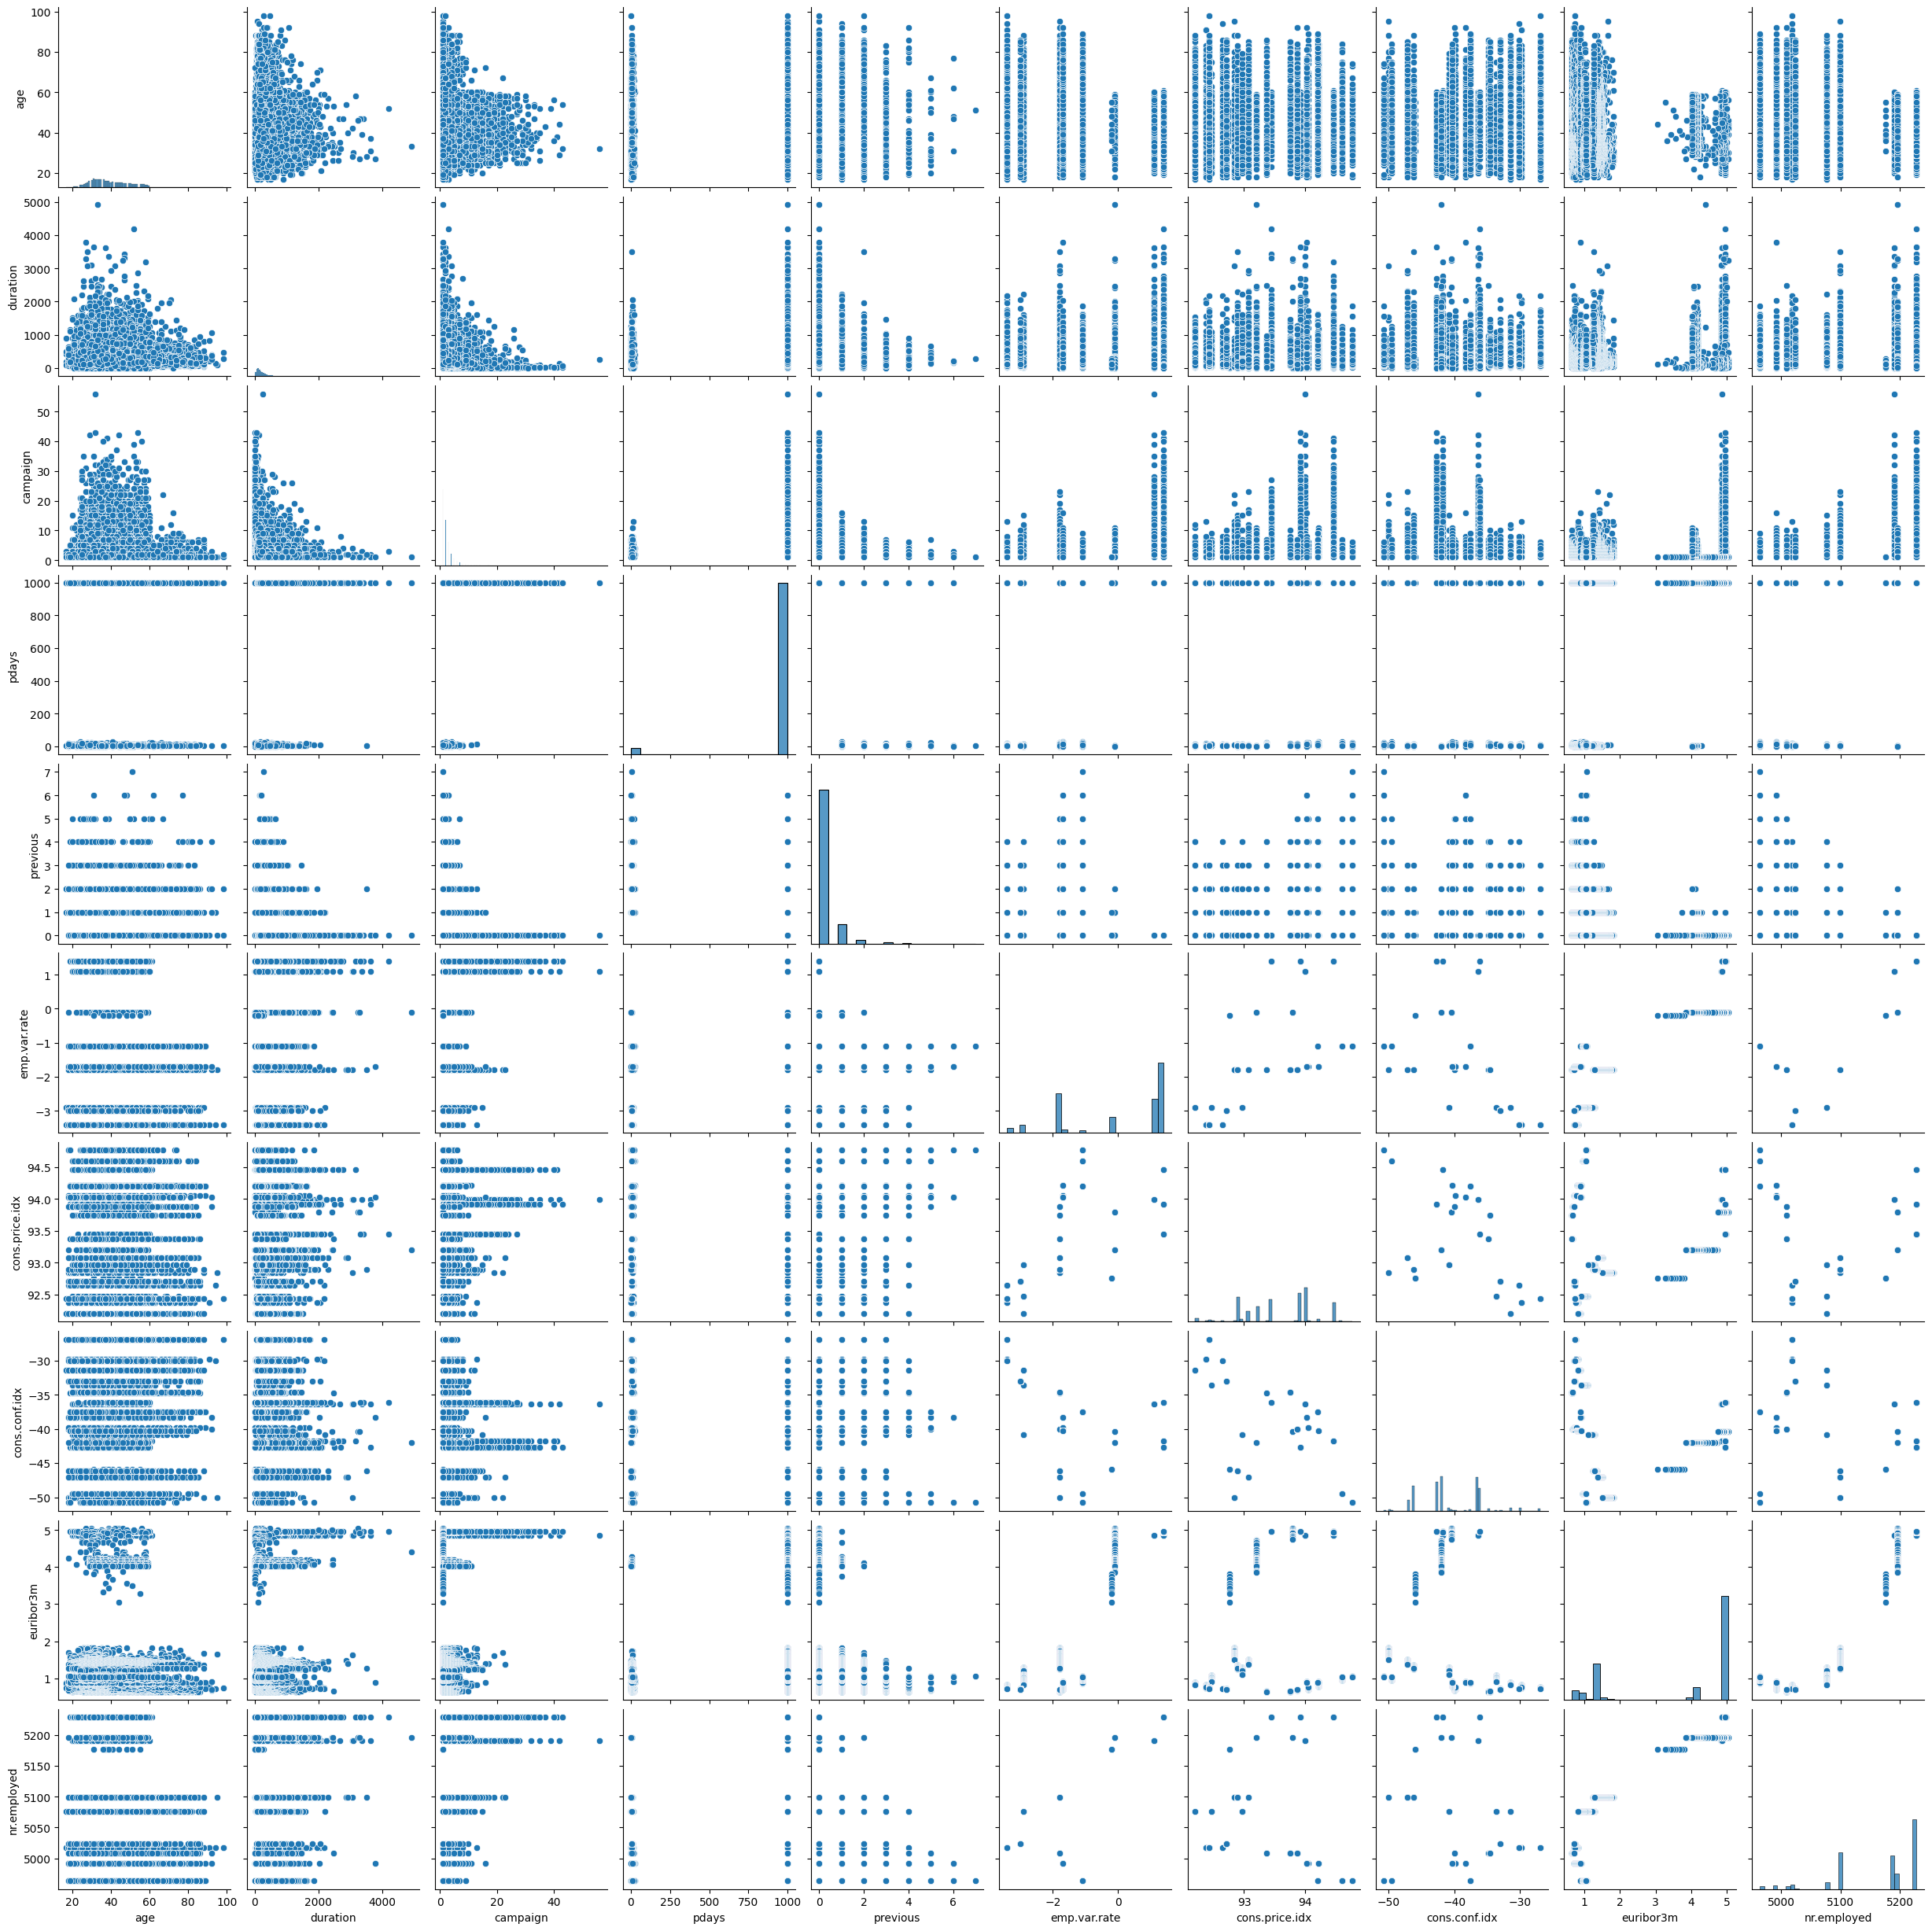

In [48]:
# THIS TAKES A LONG TIME!
sns.pairplot(df)

## Clustering

### Data Preparation

**UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!**

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.

In [51]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
X = pd.get_dummies(df)

In [53]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaler_x = scaler.fit_transform(X)

### Creating and Fitting a KMeans Model

Note of our method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [67]:
from sklearn.cluster import KMeans

In [68]:
model = KMeans(n_clusters=2)

In [69]:
# Make sure to watch video to understand this line and fit() vs transform()
cluster_labels = model.fit_predict(scaler_x)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [132]:
cluster_labels # These numbers are meaning less

array([1, 1, 1, ..., 0, 0, 0])

In [72]:
len(scaler_x)

41188

In [73]:
len(cluster_labels)

41188

In [74]:
X['Cluster'] = cluster_labels

<AxesSubplot: >

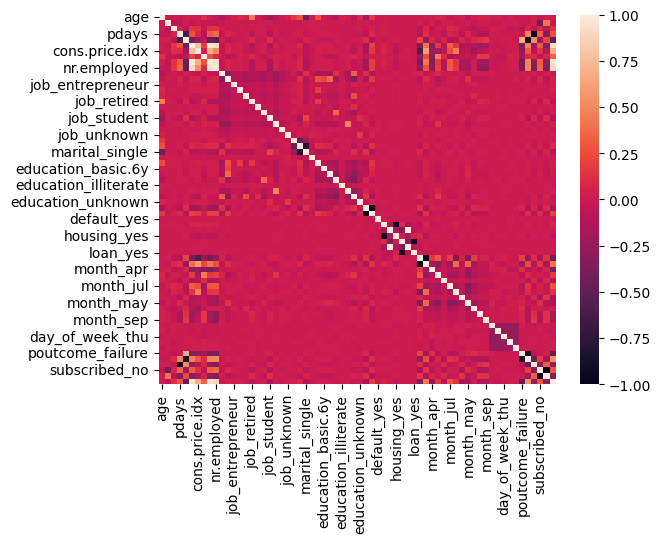

In [75]:
sns.heatmap(X.corr())

In [76]:
X.corr()['Cluster']

age                     0.019699
duration               -0.039894
campaign                0.129129
pdays                   0.267700
previous               -0.478467
                          ...   
poutcome_nonexistent    0.544377
poutcome_success       -0.254393
subscribed_no           0.294610
subscribed_yes         -0.294610
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

In [78]:
X.corr()['Cluster'].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: Cluster, Length: 65, dtype: float64

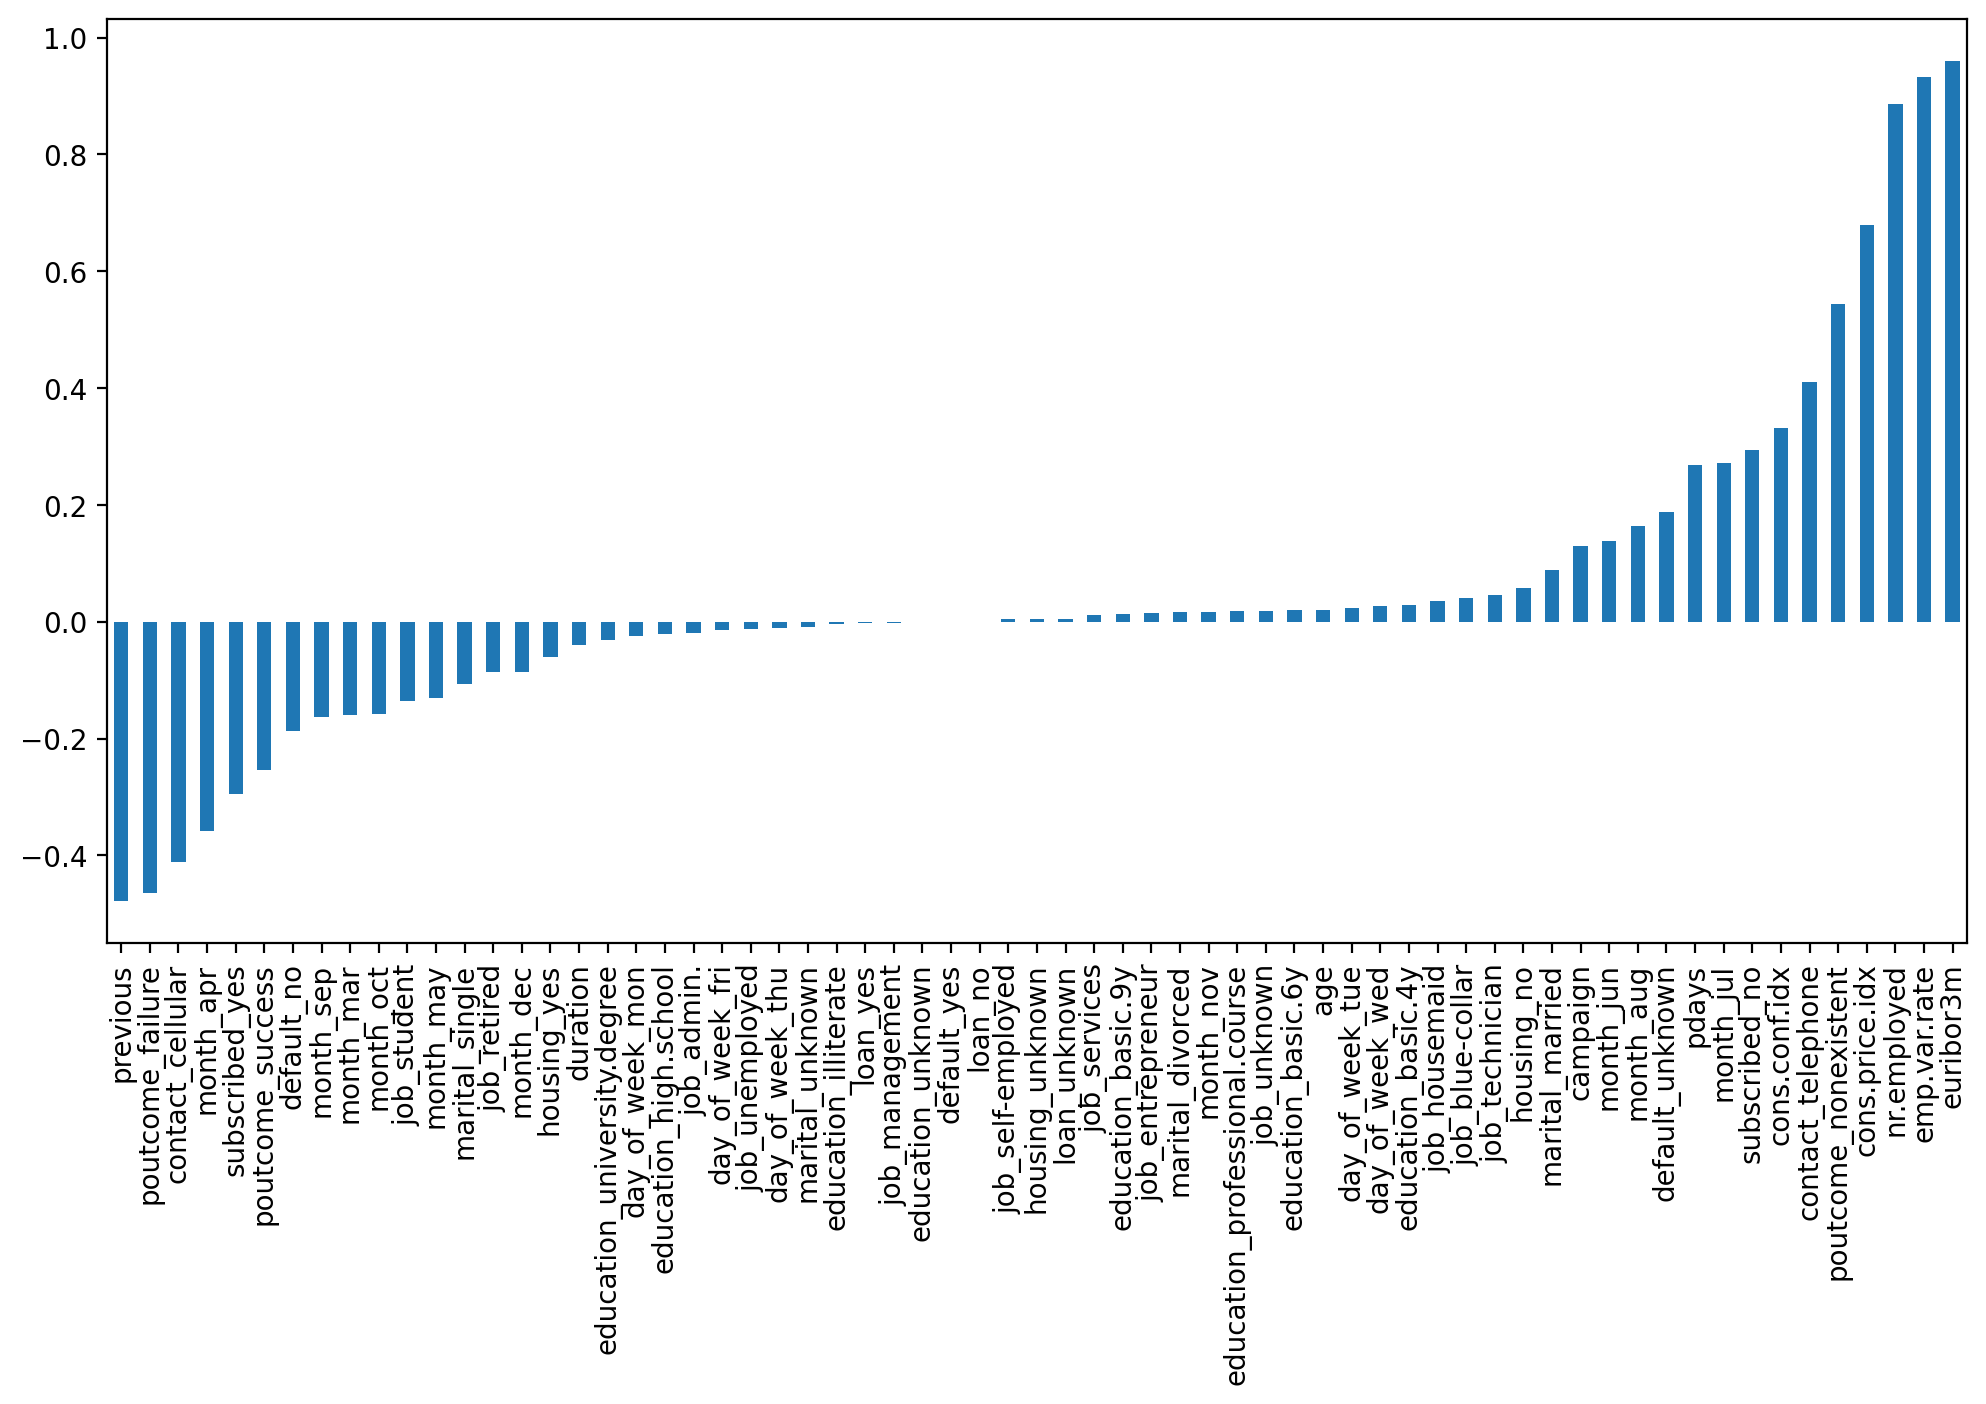

In [81]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar');

## Choosing K Value

In [83]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaler_x)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [88]:
ssd

[2469792.361662749,
 2370786.7034402364,
 2271502.6970615042,
 2200694.033064819,
 2157695.047497073,
 2102832.4143065163,
 2063724.270298891,
 2036472.7042926433]

In [91]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -99005.658223
2   -99284.006379
3   -70808.663997
4   -42998.985568
5   -54862.633191
6   -39108.144008
7   -27251.566006
dtype: float64

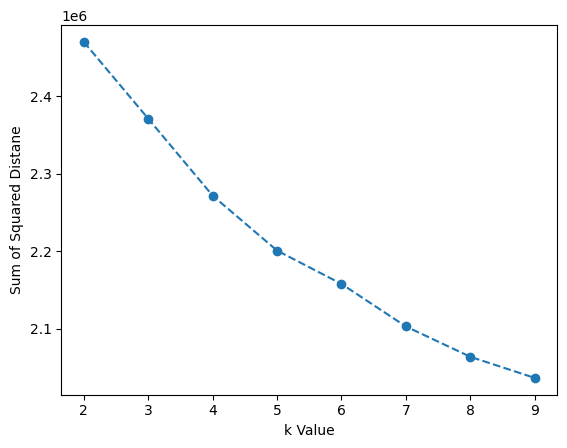

In [87]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel('k Value')
plt.ylabel('Sum of Squared Distane');

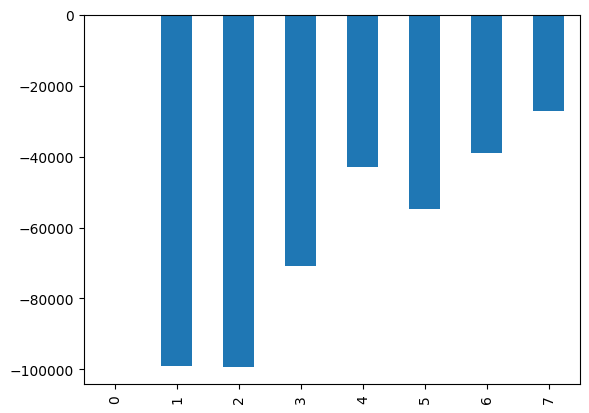

In [93]:
pd.Series(ssd).diff().plot(kind='bar');

# K Means Color Quantization

## Imports

In [94]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [95]:
image_as_array =mpimg.imread("D:\\Study\\Programming\\python\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\22 - K-Means Clustering\\33555798-palm-trees.jpg")

In [97]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

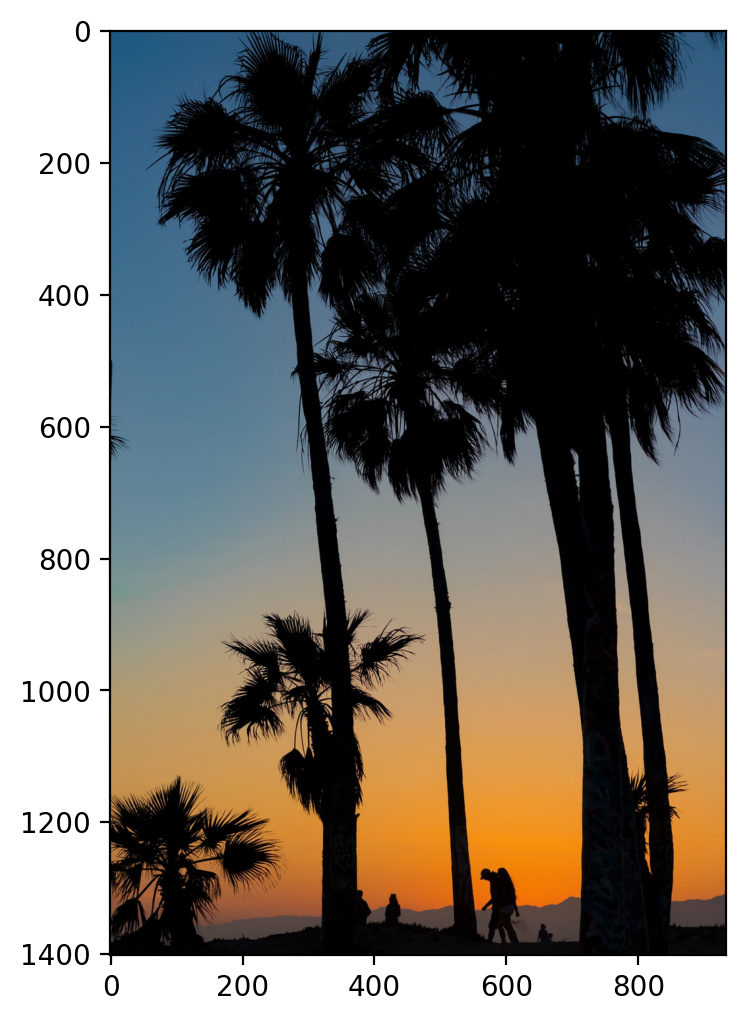

In [102]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [104]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [117]:
len(image_as_array.shape)

3

In [105]:
(h,w,c) = image_as_array.shape

In [106]:
h

1401

In [107]:
w

934

In [108]:
c

3

In [112]:
image_as_array2d = image_as_array.reshape(h*w,c)
# (H,W,C) ----> 2D (H*W,C)

In [113]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [114]:
image_as_array2d.shape

(1308534, 3)

In [115]:
len(image_as_array2d.shape)

2

In [118]:
from sklearn.cluster import KMeans

In [119]:
model = KMeans(n_clusters=6) # ^ average dub color

In [120]:
model

KMeans(n_clusters=6)

In [129]:
labels = model.fit_predict(image_as_array2d) # KMean take 2d images only

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [131]:
1401*934 #h*w

1308534

In [122]:
labels # These numbers are meaning less 

array([3, 3, 3, ..., 0, 0, 0])

In [123]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[  2.75774918,   2.57625598,   3.70101918],
       [136.92096159, 143.80549772, 143.92085936],
       [219.05638325, 135.4139575 ,  46.95275156],
       [ 71.14229478, 109.2914198 , 137.70581831],
       [ 67.28313253,  61.57612148,  62.0460535 ],
       [191.64383719, 154.52989828, 109.44177973]])

In [124]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [125]:
rgb_codes

array([[  3,   3,   4],
       [137, 144, 144],
       [219, 135,  47],
       [ 71, 109, 138],
       [ 67,  62,  62],
       [192, 155, 109]])

In [126]:
quantized_image = np.reshape(rgb_codes[labels],(h,w,c))

In [127]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

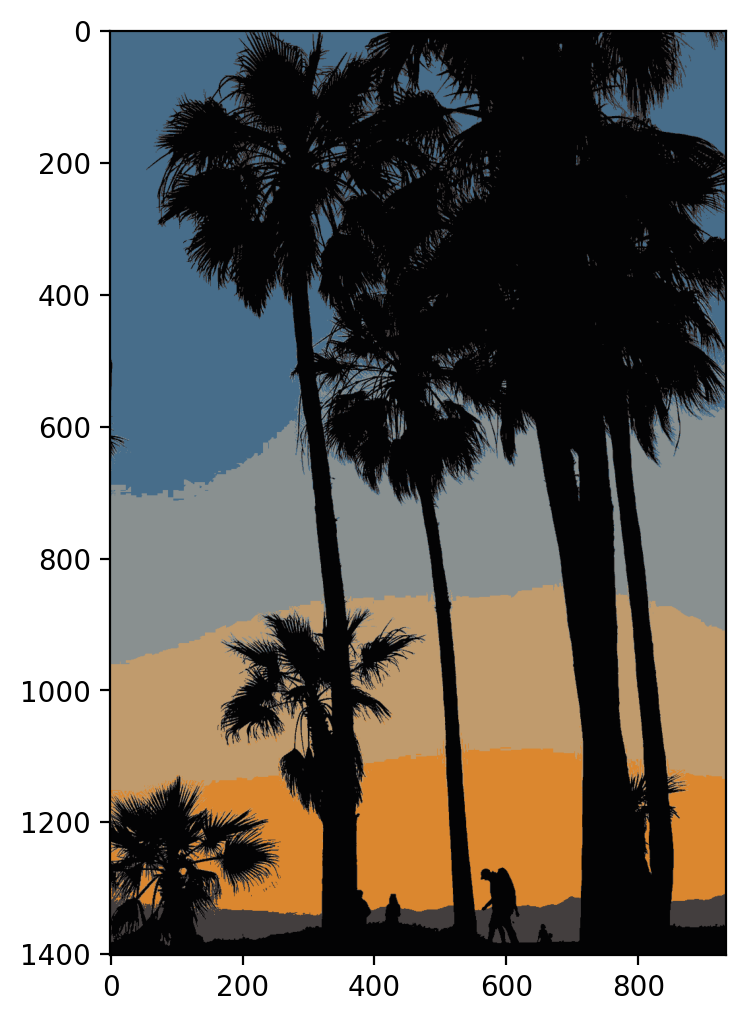

In [128]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)